<h1>Tugas Individu - Machine Learning</h1>
<h3>Studi Independen - Data Science and Artificial Intelligence - Startup Campus</h3>

<br>

<table>
  <tr>
    <td><h6>ID</h6></td>
    <td><h6>:</h6></td>
    <td><h6>SC61914</h6></td>
  </tr>
  <tr>
    <td><h6>Nama</h6></td>
    <td><h6>:</h6></td>
    <td><h6>I Made Surya Adi Palguna</h6></td>
  </tr>
  <tr>
    <td><h6>NIM</h6></td>
    <td><h6>:</h6></td>
    <td><h6>2108561067</h6></td>
  </tr>
</table>

<br>

<h3>Program Studi Informatika - Fakultas Matematika dan Ilmu Pengetahuan Alam - Universitas Udayana 2024</h3>



<h3>Dataset</h3>

<table>
  <thead>
    <tr>
      <td></td>
      <td><p>Kaggle</p></td>
      <td><p>Google Drive</p></td>
      <td><p>Update CSV</p></td>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td><p>Sales/Marketing</p></td>
      <td><a href="https://www.kaggle.com/competitions/home-data-for-ml-course/data">Akses disini</a></td>
      <td><a href="https://drive.google.com/file/d/1L8FMX43VFQ7_EW4zfQzWEfzzyH_IUzXZ/view?usp=sharing"><button>Klik disini</button></a></td>
      <td></td>
    </tr>
    <tr>
      <td><p>Health Case Study</p>(dataset yang digunakan)</td>
      <td><a href="https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset">Akses disini</a></td>
      <td><a href="https://drive.google.com/file/d/11F-2ZFC1IM7ejnRZwlgbRkJ6tOqJvaNU/view?usp=sharing"><button>Klik disini</button></a></td>
      <td><a href="https://docs.google.com/spreadsheets/d/1srCMxczID9m1Z5emBbDxle6JiHcwyF4sHWeS6aThCjE/edit#gid=1047792148"><button>Klik disini</button></a></td>
    </tr>
  </tbody>
</table>

In [ ]:
# # Import Library yang Dibutuhkan
# Library Pengolahan Data Basic
import numpy as np
import pandas as pd

# Library Algoritma Klasifikasi
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# Library Determinasi Model
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LearningCurveDisplay, learning_curve
from matplotlib import pyplot as plt

# Library Evaluasi Model
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

# Library Filtrasi Warning
from warnings import filterwarnings as fw
fw("ignore")

In [ ]:
# # Ambil Data dari Dataset
df = pd.read_csv("https://docs.google.com/spreadsheets/d/1srCMxczID9m1Z5emBbDxle6JiHcwyF4sHWeS6aThCjE/export?format=csv")
display(df)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,slope_1,slope_2,ca_0,ca_1,ca_2,thal_fixed_defect,thal_normal,thal_reversable_defect,target_disease,target_no_disease
0,52.0,male,0,125.0,212.0,False,0,168.0,no,1.0,...,False,True,False,False,True,False,False,True,False,True
1,53.0,male,0,140.0,203.0,True,0,155.0,yes,3.1,...,False,False,True,False,False,False,False,True,False,True
2,70.0,male,0,145.0,174.0,False,0,125.0,yes,2.6,...,False,False,True,False,False,False,False,True,False,True
3,61.0,male,0,148.0,203.0,False,0,161.0,no,0.0,...,False,True,False,True,False,False,False,True,False,True
4,62.0,female,0,138.0,294.0,True,0,106.0,no,1.9,...,True,False,False,True,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319,59.0,male,3,160.0,273.0,False,3,125.0,no,0.0,...,False,True,True,False,False,True,False,False,False,True
320,54.0,male,0,120.0,188.0,False,0,113.0,no,1.4,...,True,False,False,True,False,False,False,True,False,True
321,63.0,female,0,150.0,407.0,False,0,154.0,no,4.0,...,True,False,False,False,True,False,False,True,False,True
322,45.0,male,0,142.0,309.0,False,0,147.0,yes,0.0,...,True,False,False,True,False,False,False,True,False,True


In [ ]:
# # Split Data menjadi X sebagai Feature dan y sebagai Target
drop_col = [
  "sex", "cp", "fbs", "restecg", "exang", "slope", "ca", "thal", "target",
  "average_age", "average_trestbps", "average_chol", "average_thalach", "average_oldpeak",
  "dominan_sex", "dominan_cp", "dominan_fbs", "dominan_restecg", "dominan_exang", "dominan_slope", "dominan_ca", "dominan_thal",
  "target_disease", "target_no_disease"
]
X = df.drop(drop_col, axis=1)
y = df["target_disease"]

### 1. Peserta mampu melakukan determinasi machine learning model mana yang relevan sesuai dengan dataset yang telah dipilih dengan problem understanding yang telah dilakukan sebelumnya.

In [ ]:
# # Lakukan Determinasi Model untuk Memilih Algoritma Klasifikasi Terbaik
# Rangkum Algoritma Klasifikasi ke Dataframe
clf_algorithms = pd.DataFrame({
  "Name": [
    "Decision Tree", "Random Forest", "Gradient Boost", "Support Vector Machine",
    "Extreme Gradient Boost", "K-Nearest Neighbor", "Naive Bayes"
  ],
  "Function": [
    DecisionTreeClassifier(), RandomForestClassifier(), GradientBoostingClassifier(), SVC(),
    XGBClassifier(), KNeighborsClassifier(), GaussianNB()
  ],
})

# Buat Kolom Score dan Cross Valiation Score
clf_algorithms["Score"] = pd.Series()
clf_algorithms["CV_Score"] = pd.Series()

# Split Data Determinasi menjadi Data Train dan Test
ts_det = 0.3
cv_det = int((1-ts_det)/ts_det)
X_det_train, X_det_test, y_det_train, y_det_test = train_test_split(X, y, test_size=ts_det, random_state=42)

# Lakukan Running Model serta Fill Score dan Cross Validation Score Masing-Masing Algoritma Klasifikasi ke Dataframe
for i, row in clf_algorithms.iterrows():
  # Running Model Masing-Masing Algoritma Klasifikasi ke Dataframe
  np.random.seed(42)
  row["Function"].fit(X_det_train, y_det_train)

  # Fill Score dan Cross Validation Score Masing-Masing Algoritma Klasifikasi ke Dataframe
  clf_algorithms["Score"][i] = row["Function"].score(X_det_test, y_det_test)
  clf_algorithms["CV_Score"][i] = cross_val_score(row["Function"], X, y, cv=cv_det).mean()

# Cek Dataframe Algoritma Klasifikasi
display(clf_algorithms)

,Name,Function,Score,CV_Score
0,Decision Tree,DecisionTreeClassifier(),0.806122,0.725309
1,Random Forest,"(DecisionTreeClassifier(max_features='sqrt', r...",0.816327,0.82716
2,Gradient Boost,([DecisionTreeRegressor(criterion='friedman_ms...,0.816327,0.768519
3,Support Vector Machine,SVC(),0.693878,0.635802
4,Extreme Gradient Boost,"XGBClassifier(base_score=None, booster=None, c...",0.816327,0.814815
5,K-Nearest Neighbor,KNeighborsClassifier(),0.683673,0.632716
6,Naive Bayes,GaussianNB(),0.816327,0.805556


### 2. Peserta mampu menyajikan alasan penggunaan machine learning model pada poin 1.

In [ ]:
# # Lakukan Pembuatan Feature Penilaian untuk Memilih Algoritma Klasifikasi Terbaik
# Buat Kolom Max True untuk Memilih Algoritma Klasifikasi Terbaik
clf_algorithms["Max_True"] = pd.Series()

# Lakukan Fill Max True untuk Memilih Algoritma Klasifikasi Terbaik
for i, row in clf_algorithms.iterrows():
  # Deklarasikan Nilai Max True Awal
  clf_algorithms["Max_True"][i] = 0

  # Fill Max True Berdasarkan Pertimbangan Score Tertinggi
  if clf_algorithms["Score"][i] == clf_algorithms["Score"].max():
    clf_algorithms["Max_True"][i] += 1

  # Fill Max True Berdasarkan Pertimbangan Cross Validation Score Tertinggi
  if clf_algorithms["CV_Score"][i] == clf_algorithms["CV_Score"].max():
    clf_algorithms["Max_True"][i] += 1

# Cek Dataframe Algoritma Klasifikasi
display(clf_algorithms)

,Name,Function,Score,CV_Score,Max_True
0,Decision Tree,DecisionTreeClassifier(),0.806122,0.725309,0
1,Random Forest,"(DecisionTreeClassifier(max_features='sqrt', r...",0.816327,0.82716,2
2,Gradient Boost,([DecisionTreeRegressor(criterion='friedman_ms...,0.816327,0.768519,1
3,Support Vector Machine,SVC(),0.693878,0.635802,0
4,Extreme Gradient Boost,"XGBClassifier(base_score=None, booster=None, c...",0.816327,0.814815,1
5,K-Nearest Neighbor,KNeighborsClassifier(),0.683673,0.632716,0
6,Naive Bayes,GaussianNB(),0.816327,0.805556,1


In [ ]:
# # Lakukan Pemilihan Algoritma Klasifikasi Terbaik
selected_clf_algorithms = clf_algorithms.loc[clf_algorithms["Max_True"] == clf_algorithms["Max_True"].max()].reset_index(drop=True)
display(selected_clf_algorithms)

,Name,Function,Score,CV_Score,Max_True
0,Random Forest,"(DecisionTreeClassifier(max_features='sqrt', r...",0.816327,0.82716,2


### 3. Peserta dapat melakukan eksekusi coding machine learning model yang telah ditentukan pada poin 1 dengan tepat sesuai urutan yang tepat.

In [ ]:
# # Lakukan Running Model Algoritma Klasifikasi
# Split Data X dan y menjadi Data Train dan Test
ts = 0.3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=ts, random_state=42)

# Running Model Algoritma Klasifikasi
np.random.seed(42)
model = selected_clf_algorithms["Function"][0]
model.fit(X_train, y_train)

# Cek Akurasi Model Algoritma Klasifikasi
print("Akurasi: {}".format(model.score(X_test, y_test)))

Akurasi: 0.8163265306122449


### 4. Peserta mampu menerapkan cross-validation basic dari machine learning model yang telah dibuat sebelumnya.

In [ ]:
# # Running Cross Validation Algoritma Klasifikasi
cv = int((1-ts)/ts)
cv_score = cross_val_score(model, X, y, cv=cv).mean()

### 5. Peserta dapat menjelaskan hasil dari cross-validation basic yang telah dihasilkan sebelumnya pada poin 4.

In [ ]:
# # Cek Cross Validation Score Algoritma Klasifikasi
print("Akurasi Cross Validation: {}".format(cv_score))

Akurasi Cross Validation: 0.8271604938271604


### 6. Peserta mampu menerapkan learning curves dari machine learning model yang telah dibuat sebelumnya serta membuat visualisasi hasil dari learning curves yang dihasilkan.

In [ ]:
# # Lakukan Inisiasi Learning Curve Algoritma Klasifikasi
# Inisiasi Keperluan Learning Curve Algoritma Klasifikasi
train_sizes = np.linspace(0.1, 1, 10)
learning_curve_train, learning_curve_test = [], []

# Lakukan Perhitungan Learning Curve Algoritma Klasifikasi
for train_size in train_sizes:
  # Siapkan X dan y Subset untuk Learning Curve Algoritma Klasifikasi
  num_samples = int(train_size * len(X_train))
  X_subset, y_subset = X_train[:num_samples], y_train[:num_samples]

  # Running Model Learning Curve Algoritma Klasifikasi
  model.fit(X_subset, y_subset)

  # Fill Learning Curve Train dan Test Algoritma Klasifikasi
  learning_curve_train.append(model.score(X_subset, y_subset))
  learning_curve_test.append(model.score(X_test, y_test))

In [ ]:
# # Lakukan Inisiasi Learning Curve Cross Validation Algoritma Klasifikasi
train_sizes_cv, train_scores_cv, test_scores_cv = learning_curve(model, X, y, cv=cv)
display_cv = LearningCurveDisplay(train_sizes=train_sizes_cv, train_scores=train_scores_cv, test_scores=test_scores_cv, score_name="Score")

### 7. Peserta dapat menjelaskan hasil dari visualisasi learning curves yang telah dihasilkan sebelumnya pada poin 6.

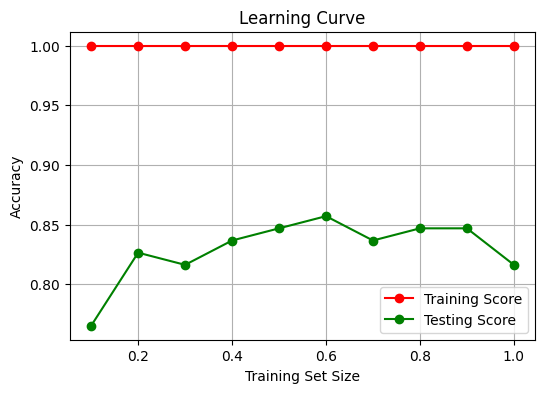

In [ ]:
# # Tampilkan Learning Curve Algoritma Klasifikasi
plt.figure(figsize=(6, 4))
plt.title("Learning Curve")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.grid()
plt.plot(train_sizes, learning_curve_train, "o-", color="r", label="Training Score")
plt.plot(train_sizes, learning_curve_test, "o-", color="g", label="Testing Score")
plt.legend(loc="best")
plt.show()

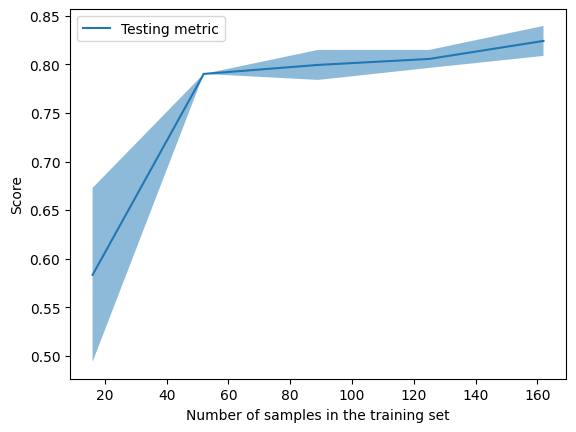

In [ ]:
# # Tampilkan Learning Curve Cross Validation Algoritma Klasifikasi
display_cv.plot()
plt.show()

### 8. Peserta mampu memperbaiki akurasi machine learning modul yang telah dibuat menggunakan hyperparameter tuning dan juga bootstrapping, jika ada.

###### Hyperparameter tuning

In [ ]:
# # Cek Spesifikasi Algoritma Klasifikasi
help(model)

Help on RandomForestClassifier in module sklearn.ensemble._forest object:

class RandomForestClassifier(ForestClassifier)
 |  RandomForestClassifier(n_estimators=100, *, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='sqrt', max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)
 |  
 |  A random forest classifier.
 |  
 |  A random forest is a meta estimator that fits a number of decision tree
 |  classifiers on various sub-samples of the dataset and uses averaging to
 |  improve the predictive accuracy and control over-fitting.
 |  The sub-sample size is controlled with the `max_samples` parameter if
 |  `bootstrap=True` (default), otherwise the whole dataset is used to build
 |  each tree.
 |  
 |  Read more in the :ref:`User Guide <forest>`.
 |  
 |  Parameters
 |  ----------

In [ ]:
# # Lakukan Hyperparameter Tuning
hyperparameter_model = RandomForestClassifier(
  # n_estimators : int, default=100
  # criterion : {"gini", "entropy", "log_loss"}, default="gini"
  # max_depth : int, default=None
  # min_samples_split : int or float, default=2
  # min_samples_leaf : int or float, default=1
  # min_weight_fraction_leaf : float, default=0.0
  # max_features : {"sqrt", "log2", None}, int or float, default="sqrt"
  # max_leaf_nodes : int, default=None
  # min_impurity_decrease : float, default=0.0
  # bootstrap : bool, default=True
  # oob_score : bool, default=False
  # n_jobs : int, default=None
  # random_state : int, RandomState instance or None, default=None
  # verbose : int, default=0
  # warm_start : bool, default=False
  # class_weight : {"balanced", "balanced_subsample"}, dict or list of dicts, default=None
  # ccp_alpha : non-negative float, default=0.0
  # max_samples : int or float, default=None

  n_estimators=100,
  max_depth=100,
  min_samples_split=10,
  max_features="sqrt",
  random_state=42,
  max_samples=75,
)

In [ ]:
# # Lakukan Pengecekan Akurasi Hyperparameter Tuning Algoritma Klasifikasi
# Running Model Hyperparameter Tuning Algoritma Klasifikasi
np.random.seed(42)
hyperparameter_model.fit(X_train, y_train)

# Cek Akurasi Hyperparameter Tuning Algoritma Klasifikasi
print("Akurasi Hyperparameter Tuning: {}".format(hyperparameter_model.score(X_test, y_test)))

Akurasi Hyperparameter Tuning: 0.8367346938775511


###### Boostrapping

In [ ]:
# # Lakukan Boostrapping Algoritma Klasifikasi
# Inisiasi Keperluan Bootstrapping Algoritma Klasifikasi
n_bootstraps = 10
bootstrapped_score = []

# Lakukan Boostrapping dan Running Model Algoritma Klasifikasi
for _ in range(n_bootstraps):
  # Lakukan Boostrapping Algoritma Klasifikasi
  bootstrapped_indices = np.random.choice(len(X_train), size=len(X_train), replace=True)
  X_bootstrap, y_bootstrap = X_train.iloc[bootstrapped_indices], y_train.iloc[bootstrapped_indices]

  # Running Model Boostrapping Algoritma Klasifikasi
  hyperparameter_model.fit(X_bootstrap, y_bootstrap)
  bootstrapped_score.append(hyperparameter_model.score(X_test, y_test))

# Cek Akurasi Boostrapping Algoritma Klasifikasi
print("Akurasi Bootstrapping: {}".format(np.mean(bootstrapped_score)))

Akurasi Bootstrapping: 0.8306122448979592


### 9. Peserta dapat mengukur model yang dibuat dengan metric evaluation yang sesuai dengan machine learning model yang telah dibuat sebelumnya dan yang terbaik untuk menyelesaikan masalah.

In [ ]:
# # Lakukan Perhitungan Metric Evaluation Algoritma Klasifikasi
# Cari Hasil y Predict Algoritma Klasifikasi
y_pred = hyperparameter_model.predict(X_test)

# Cari Hasil Confusion Matrix dan Metric Evaluation Algoritma Klasifikasi
cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec, rec, f1, _ = precision_recall_fscore_support(y_test, y_pred)

### 10. Peserta dapat memberikan interpretasi dari hasil metric evaluation serta alasan pemilihan metric yang dipilih pada poin 9.

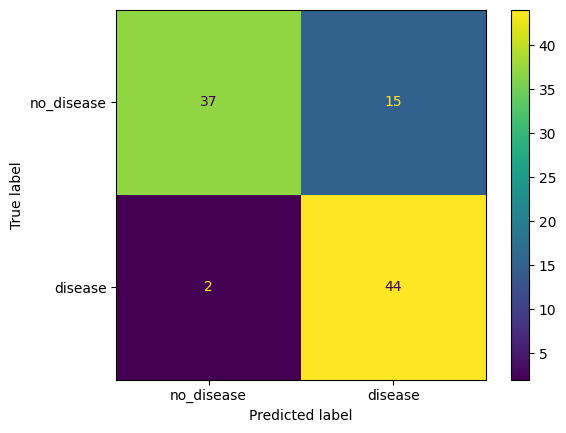

In [ ]:
# # Tampilkan Confusion Matrix Algoritma Klasifikasi
disp = ConfusionMatrixDisplay(cm, display_labels=["no_disease", "disease"])
disp.plot()
plt.show()

In [ ]:
# # Tampilkan Hasil Metric Evaluation Algoritma Klasifikasi
print("Akurasi: {}".format(acc))
print("Presisi: {}".format(list(prec)))
print("Recall: {}".format(list(rec)))
print("F1-Score: {}".format(list(f1)))

Akurasi: 0.826530612244898
Presisi: [0.9487179487179487, 0.7457627118644068]
Recall: [0.7115384615384616, 0.9565217391304348]
F1-Score: [0.8131868131868132, 0.8380952380952381]
